<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/_projects/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
df=pd.read_csv('./data/diabetes.csv')
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 데이터프레임에서 데이터의 80%에 해당하는 행의 값
split_count=int(df.shape[0]*0.8)
split_count

614

In [ ]:
# 학습에 사용할 데이터
train=df[:split_count].copy()
train.shape

(614, 9)

In [ ]:
# 테스트에 사용할 데이터
test=df[split_count:].copy()
test.shape

(154, 9)

In [ ]:
# 독립변수의 열 이름 담기
feature_names=train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# 종속변수의 열 이름 담기
label_name=train.columns[-1]
label_name

'Outcome'

In [ ]:
# 학습 데이터셋 (문제)
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# 학습 데이터셋 (정답)
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# 테스트 데이터셋 (문제)
X_test=test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [ ]:
# 테스트 데이터셋 (정답)
y_test=test[label_name]
print(y_test.shape)
y_test.head()

(154,)


,Outcome
614,1
615,0
616,0
617,0
618,1


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_predict=model.predict(X_test)
print(y_predict[:5])
print(y_test.values[:5])

[1 0 1 0 1]
[1 0 0 0 1]


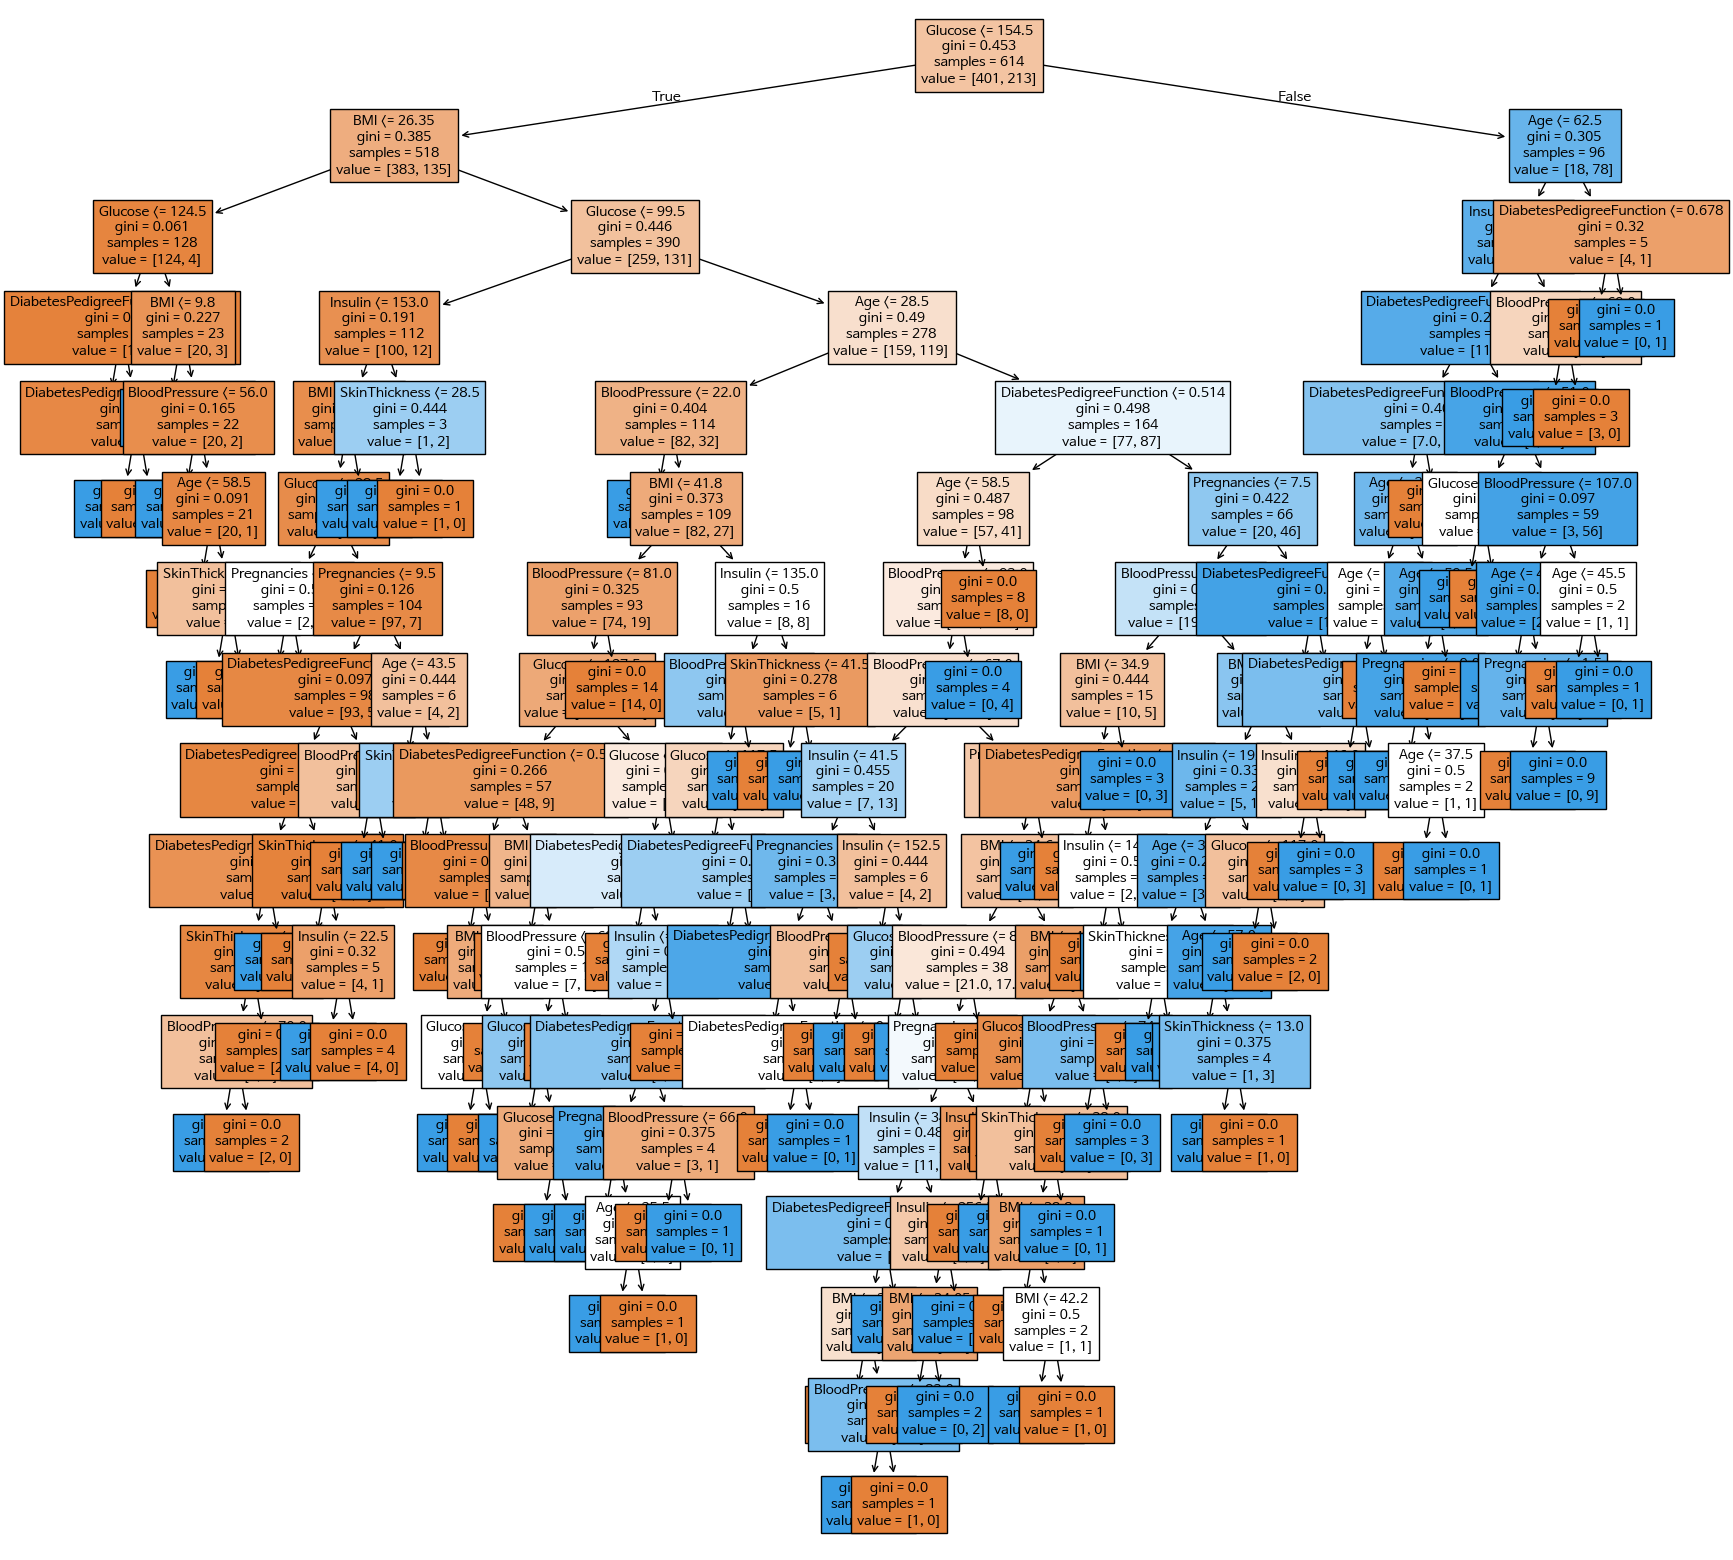

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,
               feature_names=feature_names,
               filled=True,
               fontsize=10)

In [ ]:
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

<Axes: >

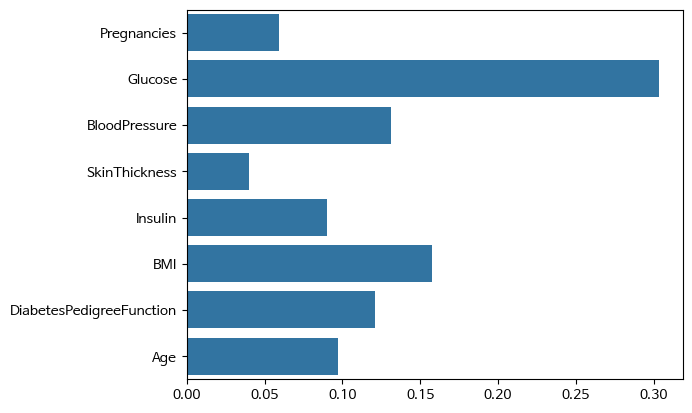

In [ ]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [ ]:
diff_count=abs(y_test-y_predict).sum()
diff_count

44

In [ ]:
(len(y_test)-diff_count)/len(y_test)*100

71.42857142857143

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)*100

71.42857142857143

In [ ]:
model.score(X_test,y_test)*100

71.42857142857143